In [2]:
import pandas as pd
import scipy.stats as stats
from scipy.stats import ttest_ind
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt

In [3]:
lunch_df = pd.read_csv("all_2013_data.csv")
lunch_df.head(10)


,State,WIC Participants,Nat School Lunch Program Participants,School Breakfast Program Participants,Summer Food Participants,% Adults with Diabetes,% Obese Adults,Population
0,AL,139001,539664,224173,30308,15.489552,36.128358,4829479
1,AK,23055,52495,20741,5078,7.103571,31.325000,728929
2,AZ,182501,646767,289520,23688,11.093333,28.773333,6624617
3,AR,89777,332497,166376,41946,13.308000,35.898667,2958663
4,CA,1431881,3294580,1517341,114689,8.774138,24.131034,38335203
5,CO,96874,375033,155733,17933,6.482812,20.682812,5267603
6,CT,54248,280253,87971,12171,8.475000,25.587500,3596003
7,DE,20797,94571,39522,8190,11.666667,30.500000,925395
8,DC,15674,50569,34873,34778,8.100000,22.400000,649165
9,FL,483565,1638775,750969,145389,12.034328,29.817910,19582022


In [4]:
lunch_per = pd.read_csv("top_ten_lunch.csv")
lunch_per = lunch_per.drop("Unnamed: 0", axis = 1)
lunch_per.head(10)

,State,% of WIC Participants,% of School Lunch Program Participants,% of School Breakfast Program Participants,% of Summer Food Participants,% Adults with Diabetes,% Obese Adults,State Population
0,MS,3.064790,13.094010,6.932160,0.900056,14.657317,36.807317,2990482
1,NE,2.148768,13.011096,3.561889,0.528696,9.829032,31.669892,1868559
2,SD,2.459235,12.789950,3.373594,0.729465,10.247692,31.540000,830746
3,TX,3.607650,12.520410,6.869920,0.681266,10.396063,28.702756,26473525
4,GA,2.899607,12.472466,6.090554,0.716649,12.686792,31.393711,9984938
5,IA,2.130579,12.425734,3.065432,0.440081,10.279798,32.581818,3091930
6,LA,3.022997,12.218177,5.741568,0.884316,12.893750,36.176563,4626402
7,KY,2.952475,12.107574,6.294704,0.458791,13.267500,34.230000,4400477
8,KS,2.441043,12.035034,3.852744,0.872401,10.879048,32.434286,2892821
9,ND,1.833239,12.025237,3.287897,0.338941,10.067925,31.871698,724019


In [5]:

lunch_per.State.isna().unique()

array([False])

In [6]:
lunch_perc  = lunch_per[lunch_per.State.isin(['MS', 'NE', 'SD', 'TX', 'GA', 'IA', 'LA', 'KY', 'KS', 'ND'])][["State","% of School Lunch Program Participants","State Population"]]
lunch_perc
lunch_perc = lunch_perc.sort_values("State Population", ascending = True)
lunch_perc

,State,% of School Lunch Program Participants,State Population
9,ND,12.025237,724019
2,SD,12.789950,830746
1,NE,13.011096,1868559
8,KS,12.035034,2892821
0,MS,13.094010,2990482
5,IA,12.425734,3091930
7,KY,12.107574,4400477
6,LA,12.218177,4626402
4,GA,12.472466,9984938
3,TX,12.520410,26473525


In [7]:

#df[df.state.isin(list_of_states)][column names]

lunch = lunch_df[lunch_df.State.isin(['MS', 'NE', 'SD', 'TX', 'GA', 'IA', 'LA', 'KY', 'KS', 'ND'])][["State","Nat School Lunch Program Participants","Population"]]
lunch

,State,Nat School Lunch Program Participants,Population
10,GA,1245368,9984938
15,IA,384195,3091930
16,KS,348152,2892821
17,KY,532791,4400477
18,LA,565262,4626402
24,MS,391574,2990482
27,NE,243120,1868559
34,ND,87065,724019
41,SD,106252,830746
43,TX,3314594,26473525


In [8]:
lunch = lunch.rename(columns={"Nat School Lunch Program Participants" : "School Lunch Program Participants"})

In [9]:
lunch = lunch.sort_values("Population", ascending = True)


lunch["Population/10"] = lunch["Population"]/10
lunch

,State,School Lunch Program Participants,Population,Population/10
34,ND,87065,724019,72401.9
41,SD,106252,830746,83074.6
27,NE,243120,1868559,186855.9
16,KS,348152,2892821,289282.1
24,MS,391574,2990482,299048.2
15,IA,384195,3091930,309193.0
17,KY,532791,4400477,440047.7
18,LA,565262,4626402,462640.2
10,GA,1245368,9984938,998493.8
43,TX,3314594,26473525,2647352.5


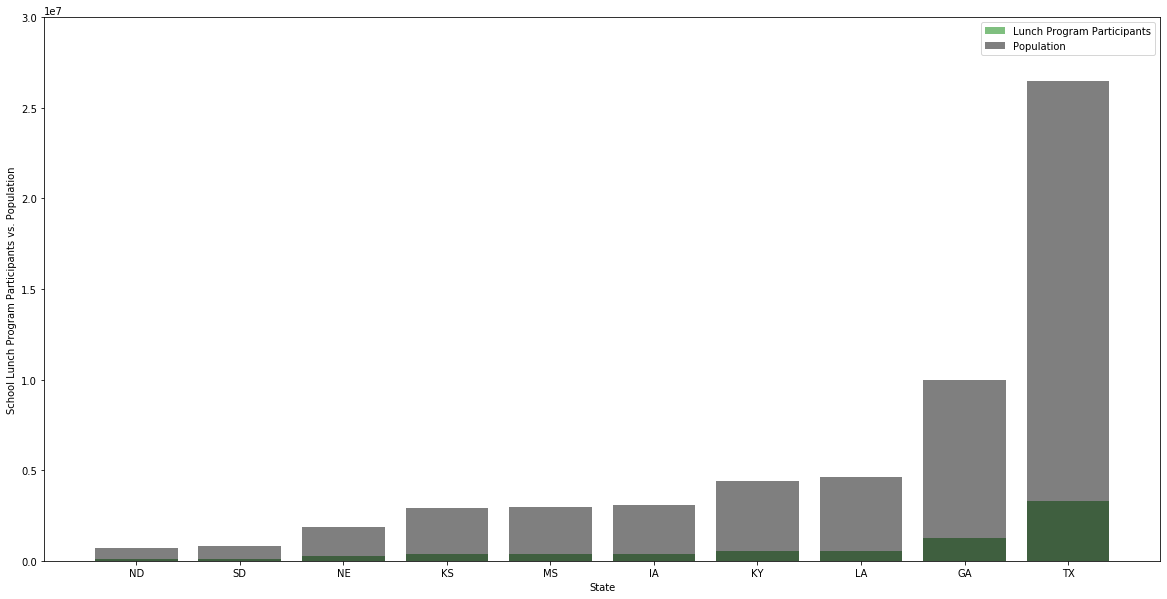

In [11]:
# y_axis = lunch[['State','Population', 'School Lunch Program Participants']]
# x_axis = x.set_index('State')
# y.plot.bar(stacked=True, figsize=(40,38))

# plt.ylabel('State Population')
# plt.ylim((70000,30000000))

x_axis = np.arange(len(lunch))
tick_locations = [value for value in x_axis]


plt.figure(figsize=(20,10))
p1 = plt.bar(x_axis, lunch["School Lunch Program Participants"], color='green', alpha=0.5, align="center")
p2 = plt.bar(x_axis, lunch["Population"], color='black', alpha=0.5, align="center")
plt.xticks(tick_locations, lunch["State"], rotation="horizontal")
plt.xlabel("State")
plt.ylabel("School Lunch Program Participants vs. Population")
plt.ylim(0, 30000000)
# plt.ylim(0, 1600000)
plt.legend((p1[0], p2[0]), ("Lunch Program Participants", "Population"))
plt.show()





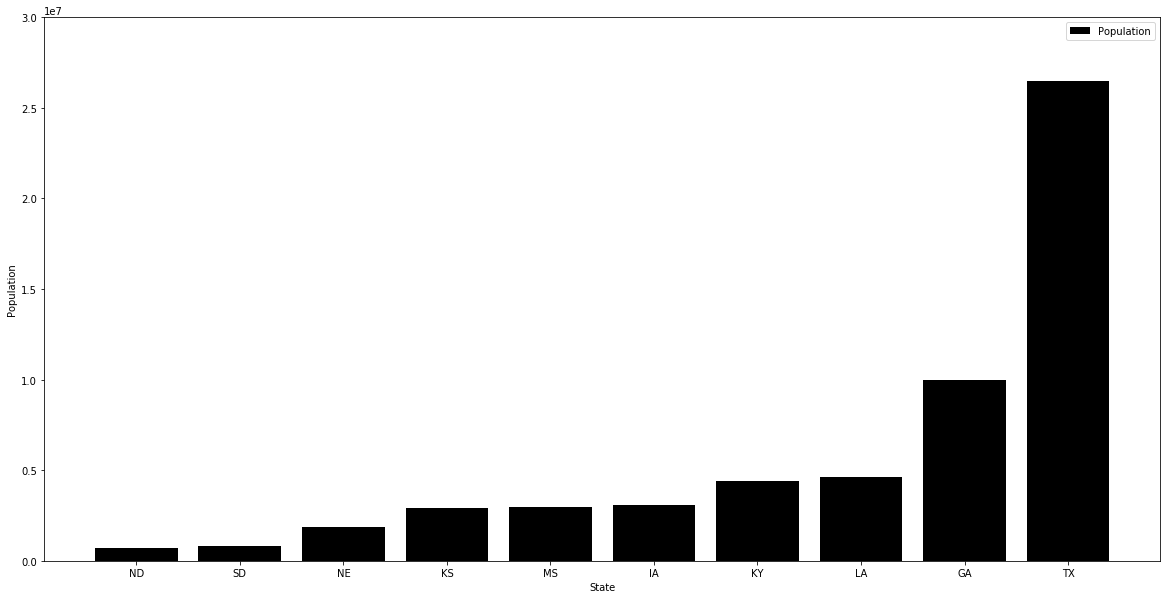

In [56]:
 #Create a list indicating where to write x labels and set figure size to adjust for space

x_axis = np.arange(len(lunch))
tick_locations = [value for value in x_axis]
    
plt.figure(figsize=(20,10))
p1 = plt.bar(x_axis, lunch['Population'], color='black', alpha=1, align="center", label="Population in Millions")
plt.xticks(tick_locations, lunch["State"], rotation="horizontal")
plt.xlabel("State")
plt.ylabel("Population")
plt.ylim(0, 30000000)
plt.legend(("Population",))
plt.show()

### 